Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313 - Advanced Machine Learning and Deep Learning
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 7** | **Performing Face Recognition**</u>
**Name** | Garcia, John Carlos
**Section** | CPE32S3
**Date Performed**: | February 21, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [2]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

In [8]:
test = read_images("/content/Dataset")
print(test)

[[array([[189, 190, 190, ...,  94,  94,  93],
       [189, 189, 190, ...,  91,  90,  89],
       [189, 189, 189, ...,  90,  88,  87],
       ...,
       [ 72,  71,  70, ...,  33,  30,  28],
       [ 74,  71,  67, ...,  34,  31,  29],
       [ 74,  72,  69, ...,  35,  32,  30]], dtype=uint8), array([[189, 189, 188, ...,  90,  88,  87],
       [189, 188, 188, ...,  91,  89,  88],
       [188, 188, 188, ...,  92,  90,  89],
       ...,
       [ 65,  68,  72, ...,  36,  35,  34],
       [ 63,  66,  71, ...,  37,  36,  35],
       [ 61,  65,  70, ...,  38,  38,  37]], dtype=uint8), array([[193, 190, 187, ...,  84,  82,  80],
       [193, 190, 188, ...,  86,  83,  82],
       [192, 190, 189, ...,  88,  86,  85],
       ...,
       [ 72,  71,  70, ...,  36,  35,  34],
       [ 72,  71,  70, ...,  36,  36,  35],
       [ 72,  71,  71, ...,  36,  36,  36]], dtype=uint8), array([[187, 186, 186, ...,  93,  93,  93],
       [185, 185, 186, ...,  92,  92,  92],
       [185, 185, 186, ...,  91,  92,

In [14]:
X, y = test
print("Total images loaded:", len(X))
print("Labels assigned:", set(y))

Total images loaded: 20
Labels assigned: {0, 1}


---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [15]:
def face_rec():
  names = ['Person A', 'Person B'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images("/content/Dataset")
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()

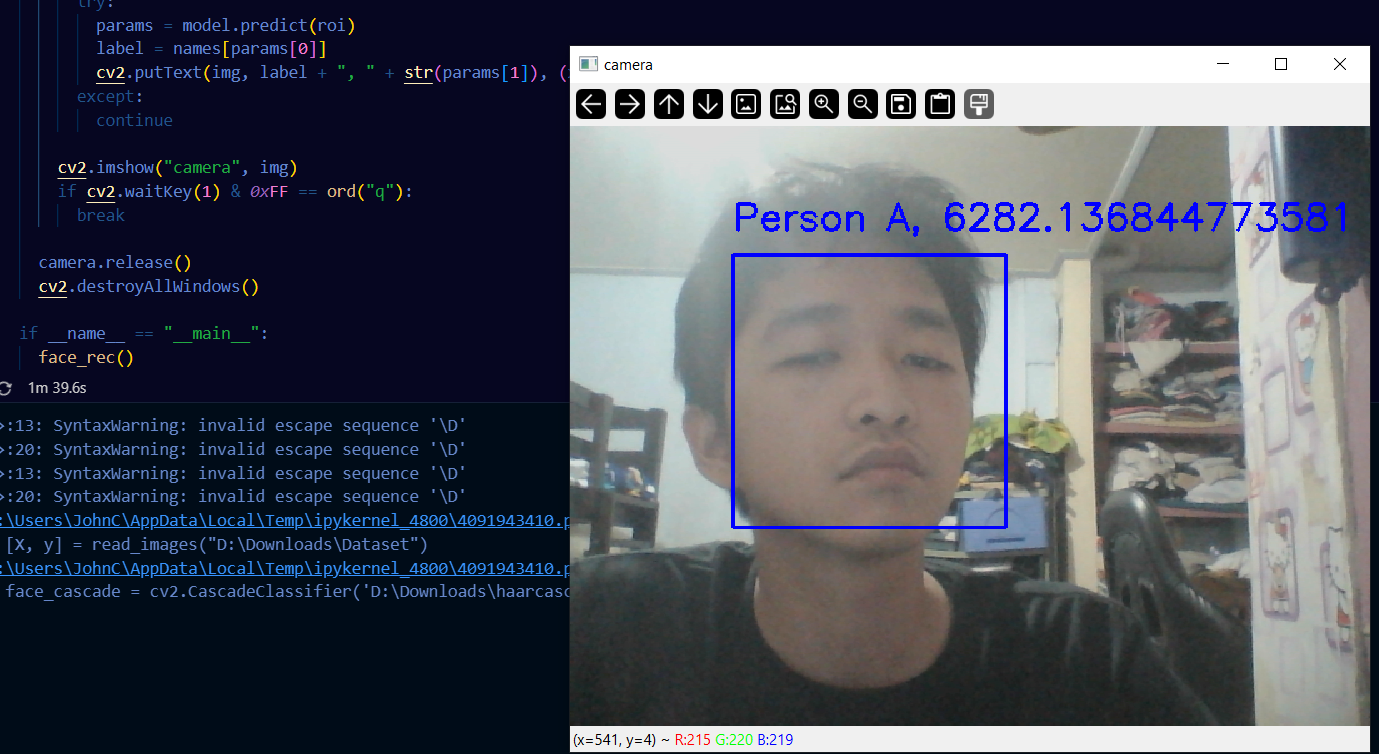

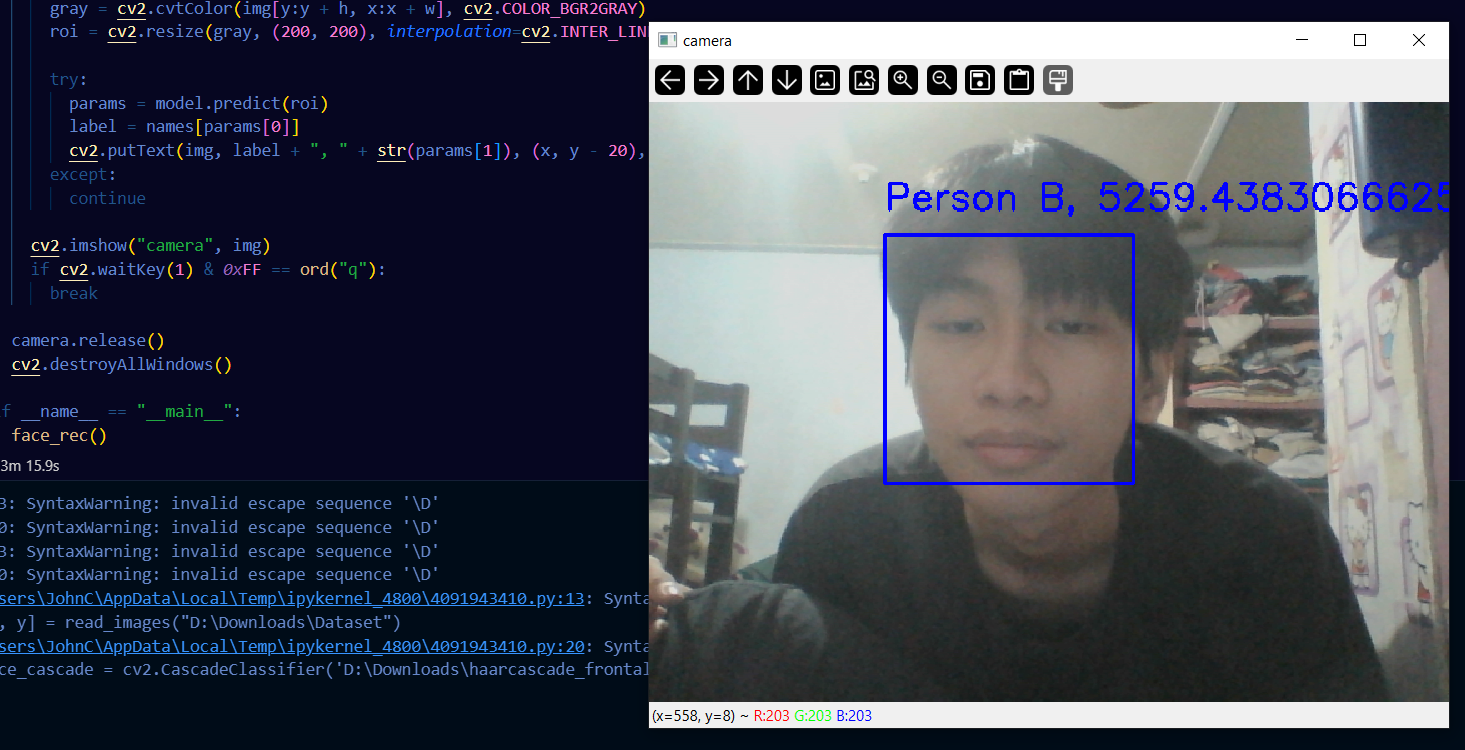

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

***The sample script implements face recognition using the Eigenface model, where it reads the images from the dataset, trains the model on it, then perform real-tie face detection and recognition through a webcam using Haarcascade. Switching from colab to visual studio code posed some problems, especially on the modules, to which I fixed without any problem.***

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

In [ ]:
import cv2
import numpy as np
import sys
import os

def read_images(dataset_path):
  X, y = [], []
  labels = []
  label_dict = {}

  for i, person in enumerate(os.listdir(dataset_path)):
    person_path = os.path.join(dataset_path, person)
    if not os.path.isdir(person_path):
      continue
    label_dict[i] = person
    for image_name in os.listdir(person_path):
      image_path = os.path.join(person_path, image_name)
      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      if img is not None:
        X.append(cv2.resize(img, (200, 200)))
        y.append(i)
  return np.asarray(X, dtype=np.uint8), np.asarray(y, dtype=np.int32), label_dict

def face_rec(model_type="eigen"):
  names = ['Person A', 'Person B']
  dataset_path = "D:/Downloads/Dataset"
  X, y, label_dict = read_images(dataset_path)
  if model_type == "eigen":
    model = cv2.face.EigenFaceRecognizer_create()
  elif model_type == "fisher":
    model = cv2.face.FisherFaceRecognizer_create()
  elif model_type == "lbph":
    model = cv2.face.LBPHFaceRecognizer_create()
  else:
    print("Invalid model type selected!")
    return
  model.train(X, y)
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  camera = cv2.VideoCapture(0)

  while True:
    ret, img = camera.read()
    if not ret:
      break
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      roi = cv2.resize(gray[y:y + h, x:x + w], (200, 200))
      try:
        label, confidence = model.predict(roi)
        person_name = label_dict.get(label, "Unknown")
        cv2.putText(img, f"{person_name}, {confidence:.2f}", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
      except Exception as e:
        print(f"Recognition Error: {e}")
        continue
      cv2.imshow("Face Recognition", img)
      if cv2.waitKey(1) & 0xFF == ord("q"):
        break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec(model_type="lbph")

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

###Eigenface Recognition


https://docs.google.com/document/d/12i4MeD9FcBPGxporsMtl7L5MMJfTT48g8vFsEmlJdeU/edit?usp=sharing


This recognition model did fairly well as it accurately recognized my face out of all the times I tested it.

###Fisherface Recognition


https://docs.google.com/document/d/1P7psdo99E1f_93VTrjl3esspzvuoVAIzrR-ciEWpzzw/edit?usp=sharing


The Fisherface model was less accurate than the Eigenface recognition model as it couldn't correctly recognize my face at the start. However, I found out that the accuracy greatly improved when I shone a light on my face, correctly recognizing me. It would seem that fisherface recognition model rely on a clear view to one's face unlike Eigenface recognition.

###Local Binary Pattern Histograms (LBPH) Recognition

https://docs.google.com/document/d/13Q6LBx6zCW6rnTl3yd4LZqMER-UKOJjxMPhRcwCrjsw/edit?usp=sharing


It felt like lbph did better than eigenface recognition as I didn't have to move as much for the model to correctly recognize my face. I also observed that it accurately identified me no matter what angle I put my face on the camera, unlike Eigenface, to which I had to find the correct angle for it to recognize me.

## 5. Summary, Conclusions and Lessons Learned

Due to time constraints, I wasn't able to accomplish the 20 tests per model. Nevertheless, even without doing 20 tests, I was still able to gain meaningful insights on the differences between how the Eigenface, Fisherface, and LBPH models work. Through testing, I also observed that each of them has their own strengths and weaknesses, especially when it comes to recognizing faces undery varying light conditions and angles. Eigenface performed well in controlled environments but struggled with variations in facial expressions and angle, fisherface model struggled with lighting, while lbph remained robust all throughout the testing phase. However, I conclude that more training is required for the models to perform optimally, and that this activity helped reinforce the importance of time management, testing, and evaluaton in machine learning.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*